In [31]:
import sys
if 'geopandas' in sys.modules:
    import geopandas as gpd
else:
    !pip install geopandas
    import geopandas as gpd

In [33]:
import shapely
import pandas as pnd
### !pip install shapely==1.8.4
import numpy as np

#import numpy as np  Note in the past, this worked, but this requires the right version.
#See here: https://stackoverflow.com/questions/65676484/cannot-make-geodataframe-from-shapely-polygons-notimplementederror-a-polygon-d
# This code was needed in order to get the right versions aligned to import
if np.__version__ != "1.20.3":
    np.__version__="1.20.3"
if gpd.__version__ != "0.10.2":
    gpd.__version__ ="0.10.2"
if shapely.__version__ != "1.8.4":
    shapely.__version__ = "1.8.4"
    
from shapely.geometry import Point, Polygon, LineString
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

__Here is the downlaod of the shapefile.__

In [22]:
states = gpd.read_file("cb_2018_us_state_5m.geojson")
states.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,31,01779792,0400000US31,31,NE,Nebraska,00,198956658395,1371829134,"POLYGON ((-104.05351 41.15726, -104.05267 41.2..."
1,53,01779804,0400000US53,53,WA,Washington,00,172112588220,12559278850,"MULTIPOLYGON (((-122.32834 48.02134, -122.3217..."
2,35,00897535,0400000US35,35,NM,New Mexico,00,314196306401,728776523,"POLYGON ((-109.05017 31.48000, -109.04984 31.4..."
3,46,01785534,0400000US46,46,SD,South Dakota,00,196346981786,3382720225,"POLYGON ((-104.05770 44.99743, -104.05021 44.9..."
4,48,01779801,0400000US48,48,TX,Texas,00,676653171537,19006305260,"POLYGON ((-106.64548 31.89867, -106.64084 31.9..."


<font color="purple">Now pull the data regarding energy source by state<font>

In [23]:
St_energy=pnd.read_csv("State_energy_Profile.csv")
St_energy.head()

,Abrv,NAME,Total,Coal,Geothermal,Pumped Storage,Hydroelectric Conventional,Natural Gas,Nuclear,Other Gases,Other,Petroleum,Solar Thermal and Photovoltaic,Other Biomass,Wind,Wood and Wood Derived Fuels,Dirty,Clean
0,AL,Alabama,1,0.186818,0.000000,0.000000,0.079936,0.400880,0.305979,0.000019,-3.924880e-07,0.000140,0.002698,0.000284,0.000000,0.023248,19%,81%
1,AK,Alaska,1,0.112514,0.000000,0.000000,0.267404,0.442606,0.000000,0.000000,-6.427440e-04,0.148447,0.000000,0.006185,0.023488,0.000000,26%,74%
2,AZ,Arizona,1,0.204470,0.000000,0.000022,0.054640,0.405844,0.281108,0.000000,-3.911860e-05,0.000561,0.046481,0.000270,0.004882,0.001761,20%,80%
3,AR,Arkansas,1,0.361765,0.000000,0.000787,0.064161,0.337856,0.210651,0.000000,7.508970e-05,0.000732,0.003264,0.001444,0.000000,0.019266,36%,64%
4,CA,California,1,0.001192,0.054088,-0.000152,0.190078,0.425409,0.080112,0.007316,3.791303e-03,0.000253,0.140405,0.013493,0.068068,0.015947,1%,99%


<font color="blue">Here let's create a merged file, and then let's create two charts for continental and not<font>

In [34]:
Full_State = pnd.merge(states,St_energy,on=["NAME"])

Ranked = Full_State["Clean"].str.replace("%","",).astype(float).rank()
Ranked = pnd.Series(Ranked)
Full_State.insert(27,"Ranked",Ranked)
#This seemed to just group each into a bucket, and we ended up with 5 so that didn't work 
RankedRange = np.array_split(Full_State["Ranked"],5)
#Full_State.insert(28,"Ranked_Range",RankedRange)
#Full_State["Ranked"]
#RankedRange

In [35]:
RR = []
for i in Full_State["Ranked"]:
    i = int(i)
    if 1 <= i <=10:
        RR.append(["0-20th Percentile"])
    elif 11<= i <=20:
        RR.append(["20-40th Percentile"])
    elif 21<= i <=30:
        RR.append(["40-60th Percentile"])
    elif 31<= i <=40:
        RR.append(["60-80th Percentile"])
    else:
        RR.append(["Top 20th Percentile"])

RR=pnd.to_numeric(RR,errors='coerce')
RR=np.reshape(RR,(50)) #Somehow this was of dimension 2
print({RR.shape})
Full_State.insert(28,"RankedRange", RR)
# Full_State.insert(26,"RankRange",RR)
#Full_State.head()
Cont_State = Full_State[Full_State["NAME"].isin(["Alaska","Hawaii"])==False]
NonCont_State = Full_State[Full_State["NAME"].isin(["Alaska"])==True]
HAW = Full_State[Full_State["NAME"].isin(["Hawaii"])==True]
Full_State['Ranked']=Full_State['Ranked'].astype('int32')
Full_State

{(50,)}


,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry,...,Other,Petroleum,Solar Thermal and Photovoltaic,Other Biomass,Wind,Wood and Wood Derived Fuels,Dirty,Clean,Ranked,RankedRange
0,31,01779792,0400000US31,31,NE,Nebraska,00,198956658395,1371829134,"POLYGON ((-104.05351 41.15726, -104.05267 41.2...",...,0.000000e+00,0.000433,0.000850,0.002266,0.193339,0.000000,55%,45%,9,0-20th Percentile
1,53,01779804,0400000US53,53,WA,Washington,00,172112588220,12559278850,"MULTIPOLYGON (((-122.32834 48.02134, -122.3217...",...,6.217620e-04,0.000187,0.000411,0.001046,0.062719,0.013440,7%,93%,36,60-80th Percentile
2,35,00897535,0400000US35,35,NM,New Mexico,00,314196306401,728776523,"POLYGON ((-109.05017 31.48000, -109.04984 31.4...",...,-2.274370e-05,0.005220,0.038832,0.000642,0.195940,0.000000,42%,58%,12,20-40th Percentile
3,46,01785534,0400000US46,46,SD,South Dakota,00,196346981786,3382720225,"POLYGON ((-104.05770 44.99743, -104.05021 44.9...",...,0.000000e+00,0.000940,0.000126,0.000000,0.192279,0.000000,18%,82%,28,40-60th Percentile
4,48,01779801,0400000US48,48,TX,Texas,00,676653171537,19006305260,"POLYGON ((-106.64548 31.89867, -106.64084 31.9...",...,1.056295e-03,0.000320,0.009034,0.000867,0.173055,0.002157,20%,80%,25,40-60th Percentile
5,06,01779778,0400000US06,06,CA,California,00,403503931312,20463871877,"MULTIPOLYGON (((-118.60337 33.47810, -118.5987...",...,3.791303e-03,0.000253,0.140405,0.013493,0.068068,0.015947,1%,99%,46,Top 20th Percentile
6,21,01779786,0400000US21,21,KY,Kentucky,00,102279490672,2375337755,"MULTIPOLYGON (((-89.40565 36.52817, -89.39869 ...",...,6.601420e-04,0.000701,0.000627,0.001364,0.000000,0.003845,72%,28%,4,0-20th Percentile
7,39,01085497,0400000US39,39,OH,Ohio,00,105828882568,10268850702,"MULTIPOLYGON (((-82.73571 41.60336, -82.71880 ...",...,6.809940e-05,0.007037,0.001180,0.003702,0.017024,0.002009,40%,60%,14,20-40th Percentile
8,01,01779775,0400000US01,01,AL,Alabama,00,131174048583,4593327154,"MULTIPOLYGON (((-88.04374 30.51742, -88.03661 ...",...,-3.924880e-07,0.000140,0.002698,0.000284,0.000000,0.023248,19%,81%,27,40-60th Percentile
9,13,01705317,0400000US13,13,GA,Georgia,00,149482048342,4422936154,"POLYGON ((-85.60516 34.98468, -85.55259 34.984...",...,7.287190e-04,0.001922,0.016790,0.002472,0.000000,0.039300,20%,80%,25,40-60th Percentile


<font color="purple">__Now just create the graph with two color__<font>

In [27]:
colMap = LinearSegmentedColormap.from_list("", ["red","lime"])

(-127.62233794999999,
 -64.06073104999999,
 23.271492200000004,
 50.62782779999999)

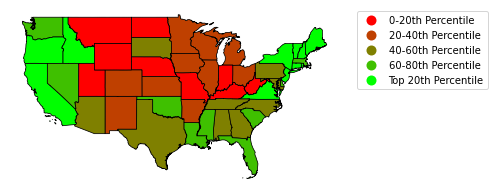

In [28]:
cont = Cont_State.plot(column='RankedRange',cmap=colMap,legend=True,legend_kwds={'bbox_to_anchor': (1.45, 1)},edgecolor="black",linewidth=.75)
cont.axis('off')

(-195.0, -115.0, 48.0, 75.0)

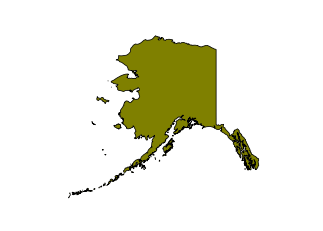

In [39]:
#We need to extract the mid color or Alaska since it is isolated and is in the middle of the categorical values
midCol = colMap(0.5) #Get the midpoint of the previous colormap (since Alaska is in the midrange)
midCol = ListedColormap(np.array(midCol)) #Use ListedColormap and the RGB values to get color
AL = NonCont_State.plot(column='RankedRange',cmap=midCol, legend=False, edgecolor="black", linewidth=.75)
AL.set_xlim(-195,-115)
AL.set_ylim(48,75)
AL.axis('off')

# np_resized

(-170.0, -145.0, 15.0, 28.0)

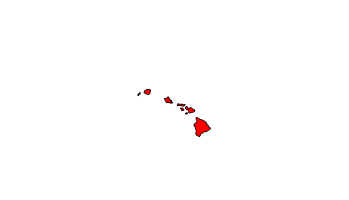

In [40]:
#Hawaii doesn't need any modification because it is one of the top dirtiest generation states
H = HAW.plot(column='RankedRange',cmap=colMap, legend=False, edgecolor="black", linewidth=.75)
H.set_xlim(-170, -145)
H.set_ylim(15,28)
H.axis('off')

In [41]:
#This is to determine if user should export.
def get_outpt():
    try:
        return{"y":True,"n":False}[input("Do you want to export these? Enter \"Y\" or \"N\"").lower()]
    except:
        print("Invalid entry")
export = get_outpt()
if export == True:
    import getpass as gp
    usr = gp.getuser()

Do you want to export these? Enter "Y" or "N"y


In [42]:
#This will export all of that information so that you can use it in other applications.
if export == True:
    exp_rank = Full_State.filter(["NAME","Ranked"])
    exp_rank.sort_values(by=["Ranked"], ascending=False)
    exprt_str = 'C:/Users/' + usr + '/OneDrive/Desktop/state_stats.csv'
    exprt_str2 = 'C:/Users/' + usr +'/OneDrive/Documents/Python Scripts/Continental.png'
    exprt_str3 = 'C:/Users/' + usr +'/OneDrive/Documents/Python Scripts/Alaska.png'
    exprt_str4 = 'C:/Users/' + usr +'/OneDrive/Documents/Python Scripts/Hawaii.png'
    exp_rank.to_csv(exprt_str)
    cont.figure.savefig(exprt_str2)
    AL.figure.savefig(exprt_str3)
    H.figure.savefig(exprt_str4)
        